# Menpo Widgets

The aim of this notebook is to demonstrate the high level widget functions that visualise all the `MenpoFit` objects. It is split in the following sections:

1. [__Basics__](#sec:basics)
2. [__PointClouds/PointGraphs Widget__](#sec:visualize_pointclouds)
3. [__LandmarkGroups Widget__](#sec:visualize_landmarkgroups)
4. [__Landmarks Widget__](#sec:visualize_landmarks)
5. [__Images Widget__](#sec:visualize_images)
6. [__Patches Widget__](#sec:visualize_patches)
7. [__Features Widget__](#sec:features_selection)
8. [__Plot Graph Widget__](#sec:plot_graph)
9. [__Save Figure Widget__](#sec:save_matplotlib_figure)
10. [__View Widget Methods__](#sec:view_widget)

## <a name="sec:basics"></a>1. Basics

Let's first import all the widgets:

In [1]:
from menpowidgets import (visualize_pointclouds, visualize_landmarkgroups, visualize_landmarks, 
                          visualize_images, visualize_patches, plot_graph, save_matplotlib_figure, 
                          features_selection)

They are all functions which have some common arguments:

* __style__: It can be either ``'coloured'`` or ``'minimal'``. The ``'coloured'`` style uses a colouring theme that is different for each widget. The ``'minimal'`` style is very simple with black and white colours.
* __figure_size__: This argument is a `tuple` that defines the size of the rendered figure in inches. The figure size can also be controlled from the _Renderer_ options within the widgets.
* __browser_style__: It can be either ``'buttons'`` or ``'slider'``. THis argument exists in widgets that visualize a list of objects (e.g. images or pointclouds). If ``'buttons'``, then the object selection will be done by a _next_ and _previous_ button. If ``'slider'``, then the object selection is done using a slider widget.

Note that all widgets can get as input a `list` of objects with totally different attributes between them. For example, `list` of images with different number of channels or `list` of `LandmarkGroups` with different number of points. Finally, they all have a _Renderer_ tab that has many rendering-related options (such as lines, markers, axes, legend, grid, image) and an _Export_ tab that allows the user to save the figure to file.

Before moving on, let's create some lists of objects to visualize with different properties. First let's import what is needed.

In [2]:
%matplotlib inline
import menpo.io as mio
from menpo.landmark import (labeller, face_ibug_68_to_face_ibug_49, face_ibug_68_to_face_ibug_66, 
                            face_ibug_68_to_face_ibug_68_trimesh, face_ibug_68_to_face_ibug_68)
from menpo.feature import igo, hog, lbp

Now let's load the builtin assets and differentiate them:

In [3]:
im1 = mio.import_builtin_asset.breakingbad_jpg()
im1 = im1.crop_to_landmarks_proportion(0.2)
labeller(im1, 'PTS', face_ibug_68_to_face_ibug_68)

im2 = mio.import_builtin_asset.einstein_jpg()
im2 = im2.crop_to_landmarks_proportion(0.2)
im2 = igo(im2, double_angles=True)
labeller(im2, 'PTS', face_ibug_68_to_face_ibug_49)

im3 = mio.import_builtin_asset.lenna_png()
im3 = im3.crop_to_landmarks_proportion(0.2)
im3 = hog(im3)

im4 = mio.import_builtin_asset.takeo_ppm()
im4 = im4.crop_to_landmarks_proportion(0.2)
labeller(im4, 'PTS', face_ibug_68_to_face_ibug_68_trimesh)

im5 = mio.import_builtin_asset.tongue_jpg()
im5 = im5.crop_to_landmarks_proportion(0.2)
im5 = im5.as_greyscale()

im6 = mio.import_builtin_asset.menpo_thumbnail_jpg()

## <a name="sec:visualize_pointclouds"></a>2. PointClouds/PointGraphs Widget
First, we need to add the objects in a list

In [4]:
pointclouds = [im1.landmarks['PTS'].lms,
               im2.landmarks['face_ibug_49'].lms,
               im3.landmarks['LJSON'].lms,
               im4.landmarks['PTS'].lms,
               im5.landmarks['PTS'].lms]

and then get the widget

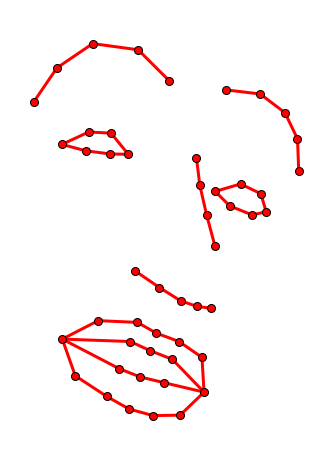

In [5]:
visualize_pointclouds(pointclouds)

By pressing the <i class="fa fa-play"></i> button, the widget automatically goes through all and visualizes the objects. The animation speed can be controlled by <i class="fa fa-fast-backward"></i> / <i class="fa fa-fast-forward"></i>. The repeat mode can be controlled by <i class="fa fa-repeat"></i> / <i class="fa fa-long-arrow-right"></i>.

The 1st tab prints some information regarding each PointCloud.

The 2nd tab has rendering options regarding the markers, lines, numbering, axes and zoom. There are also two radiobuttons that define the axes mode.

The 3rd tab allows the user to save a figure to file.

## <a name="sec:visualize_landmarkgroups"></a>3. LandmarkGroups Widget

Let's group all `LandmarkGroups` in a `list`

In [6]:
landmark_groups = [im1.landmarks['PTS'], 
                   im2.landmarks['face_ibug_49'], 
                   im3.landmarks['LJSON'],
                   im4.landmarks['PTS'],
                   im5.landmarks['PTS'],
                   im3.landmarks['LJSON']]

and visualize them using the `visualize_landmarkgroups()` widget with a `slider` browser style

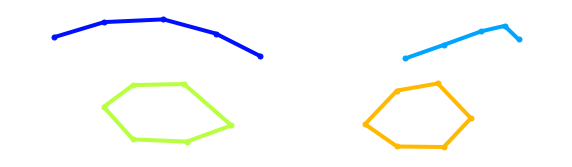

In [7]:
visualize_landmarkgroups(landmark_groups, browser_style='slider')

The animation works as before, with the difference that the buttons are replaced by a slider.

The 1st tab prints some information regarding each LandmarkGroup.

The 2nd tab has options related to the landmarks. Specifically, the user can select to render specific labels.

The 3nd tab has rendering options regarding the lines, markers, numbering of points, legend, zoom and axes. Once again, there are also two radiobuttons that define the axes mode.

Finally, the last tab allows the user to save a figure to file.

## <a name="sec:visualize_landmarks"></a>4. Landmarks Widget

First we need to create a `list` of `LandmarkManager` objects and then visualize them using a ``'minimal'`` style

In [8]:
landmarks = [im1.landmarks, 
             im2.landmarks, 
             im3.landmarks, 
             im4.landmarks, 
             im5.landmarks, 
             im6.landmarks]

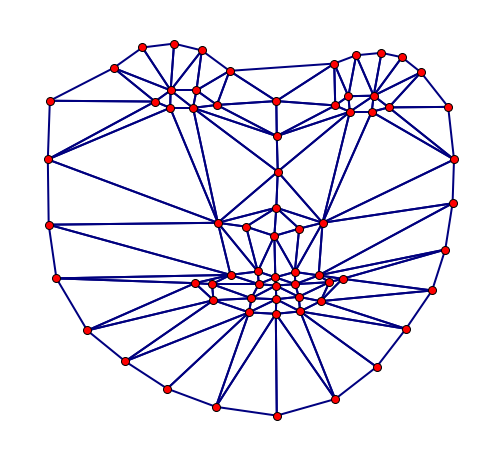

In [9]:
visualize_landmarks(landmarks, style='minimal')

This widget has the exact same structure and functionality as the previous one for LandmarkGroups. The only difference is that in the `Landmarks` tab, the _group_ can also be specified in case a `LandmarkManager` has more than one groups.

## <a name="sec:visualize_images"></a>5. Images Widget

Let's now create a list with the actual `Image` objects and visualize them

In [10]:
images = [im1, im2, im3, im4, im5, im6]

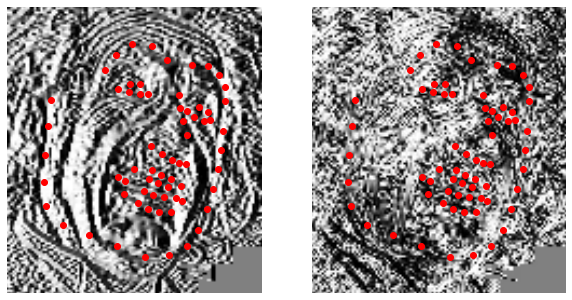

In [11]:
visualize_images(images)

Compared to the `visualize_landmarks()` widget, this one has an additional tab for _Channels_ options. In this tab, the user has several options, such as to visualize the image's channels individually or in subplots, to render the image as a `glyph` and to render the sum of the image's channels.

## <a name="sec:visualize_patches"></a>6. Patches Widget

Let's now extract some patches from the images and create two lists: one with the patches and one with the patche centers.

In [12]:
patches1 = im1.extract_patches_around_landmarks(group='PTS')
pc1 = im1.landmarks['PTS'].lms
patches2 = im2.extract_patches_around_landmarks(group='face_ibug_49')
pc2 = im2.landmarks['face_ibug_49'].lms
patches3 = im3.extract_patches_around_landmarks(group='LJSON')
pc3 = im3.landmarks['LJSON'].lms
patches4 = im4.extract_patches_around_landmarks(group='face_ibug_68_trimesh')
pc4 = im4.landmarks['face_ibug_68_trimesh'].lms
patches5 = im5.extract_patches_around_landmarks(group='PTS')
pc5 = im5.landmarks['PTS'].lms

patches = [patches1, patches2, patches3, patches4, patches5]
patch_centers = [pc1, pc2, pc3, pc4, pc5]

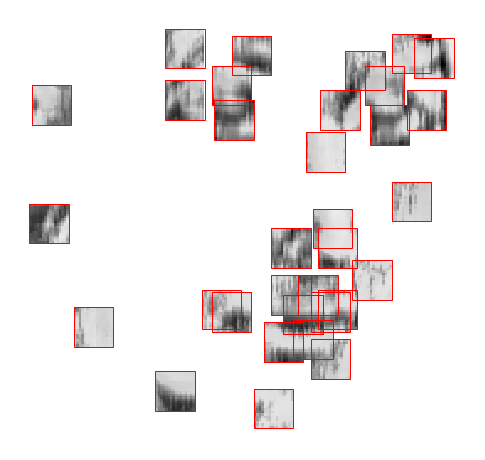

In [13]:
visualize_patches(patches, patch_centers)

The `visualize_patches` is exactly the same with `visualize_images`, with the difference that it has a patch-related options tab. 

## <a name="sec:features_selection"></a>7. Features Widget

_MenpoWidgets_ also has a widget for selecting a specific feature with some options. In order to facilitate the options selection, the widget has a _Preview_ tab that applies the feature on the `Lenna` image. The widget returns a `function` as a single element of a `list`. This can be done as

In [15]:
feat = features_selection()

Note that by pressing the _Select_ button, the widget automatically closes. Then the function can be applied to a new image as:

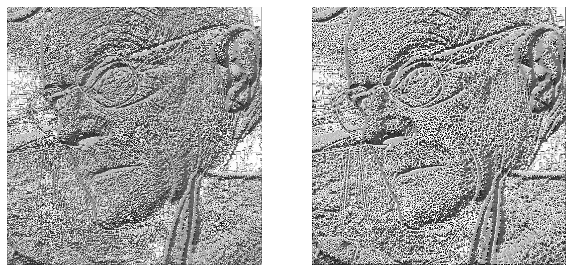

In [16]:
feat[0](im1).view(channels=[0, 1]);

## <a name="sec:plot_graph"></a>8. Plot Graph Widget

There is a widget that facilitates the graph plotting. It supports plotting of multiple curves. It expects a `list` of values for `x_axis` and a `list` of `lists` of values for `y_axis`, each one corresponding to a different curve. Let's generate the values of sin and cos

In [17]:
import numpy as np

x_axis = [x * np.pi / 10.0 for x in range(21)]

y_sin = list(np.sin(x_axis))
y_cos = list(np.cos(x_axis))
y_axis = [y_sin, y_cos]

The widget has a `legend_enrties` argument. 

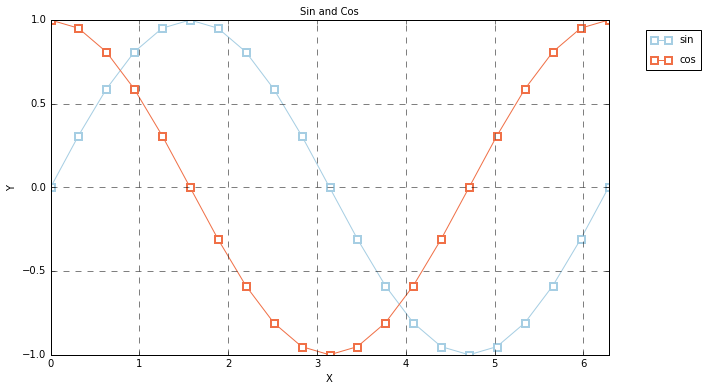

In [18]:
plot_graph(x_axis, y_axis, legend_entries=['sin', 'cos'])

In the 1st tab, the user can set the _X/Y labels_, the _Title_ and the _Legend entries_.

In the 2nd tab, there are _Renderer_ options that can be defined for each curve separately. 

Finally, as always, the last tab allows the user to save the plot to file.

## <a name="sec:save_matplotlib_figure"></a>9. Save Figure Widget

The widget to save a figure to file can be called independently. Specifically, assume that we have figure from which we kept the rendering object:

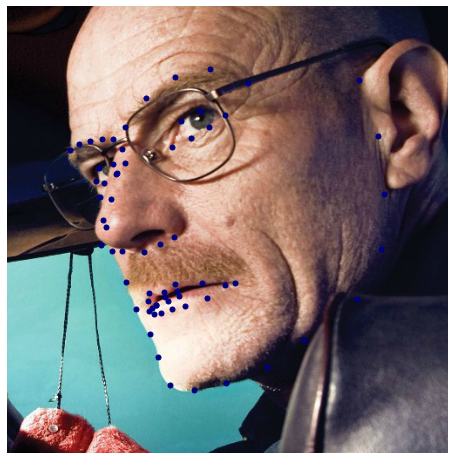

In [19]:
renderer = im1.view_landmarks(group='PTS')

The widget to save it to file can be called as:

In [20]:
save_matplotlib_figure(renderer)

Note that if the _Overwrite if file exists_ checkbox is not ticked, then a warning will appear when trying to save to a file that already exists.

## <a name="sec:view_widget"></a>10. View Widget Methods

Finally, all _Menpo_ objects have a `.view_widget()` method. Below are some examples:

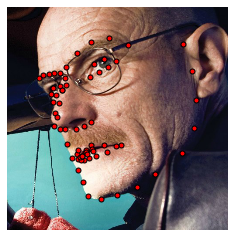

In [21]:
images[0].view_widget(figure_size=(6, 4))

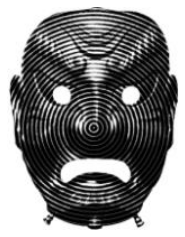

In [22]:
images[-1].view_widget(figure_size=(6, 4))

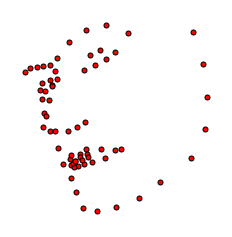

In [23]:
pointclouds[0].view_widget(figure_size=(6, 4))

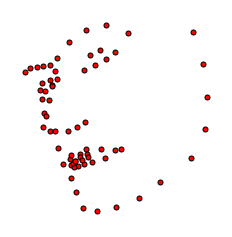

In [24]:
landmark_groups[0].view_widget(figure_size=(6, 4))

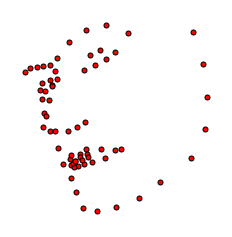

In [25]:
landmarks[0].view_widget(figure_size=(6, 4))